In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


1- Dataset Loading

In [21]:

# Load the dataset
df = pd.read_csv("../data/Phishing_URL_Dataset.csv")  

2- Data Exploring

In [22]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [24]:
df.shape

(235795, 56)

3- Data Cleaning

In [5]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [6]:
df.duplicated().sum()

np.int64(0)

In [27]:
#show all columns with object data type
object_columns = df.select_dtypes(include='object')
print(object_columns.columns)

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')


In [28]:
df=df.drop(["FILENAME","URL","Domain","TLD","Title"], axis=1)




In [ ]:
print(df.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')


4- Data Visualization

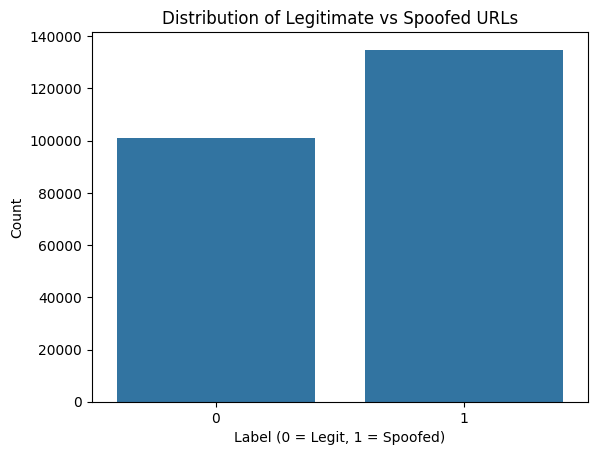

In [29]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Legitimate vs Spoofed URLs')
plt.xlabel('Label (0 = Legit, 1 = Spoofed)')
plt.ylabel('Count')
plt.show()

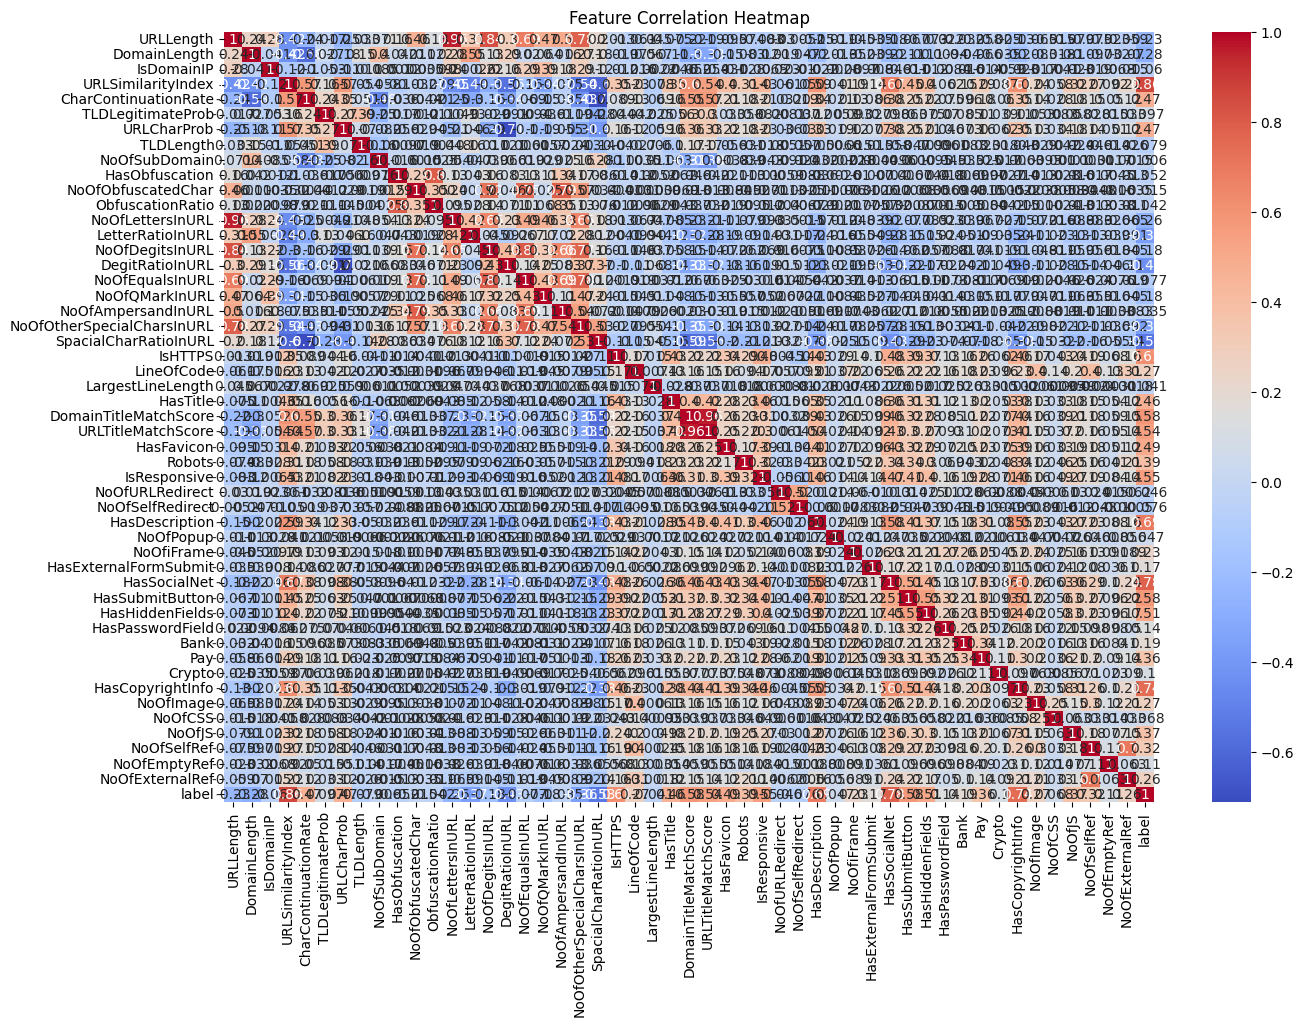

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

5- Feature Extractions

In [76]:

#Select relevant features and target variable
features = [
    "URLLength", "IsDomainIP", "HasObfuscation",
    "SpacialCharRatioInURL", "IsHTTPS", "NoOfSubDomain"
]

X = df[features]
y = df["label"]

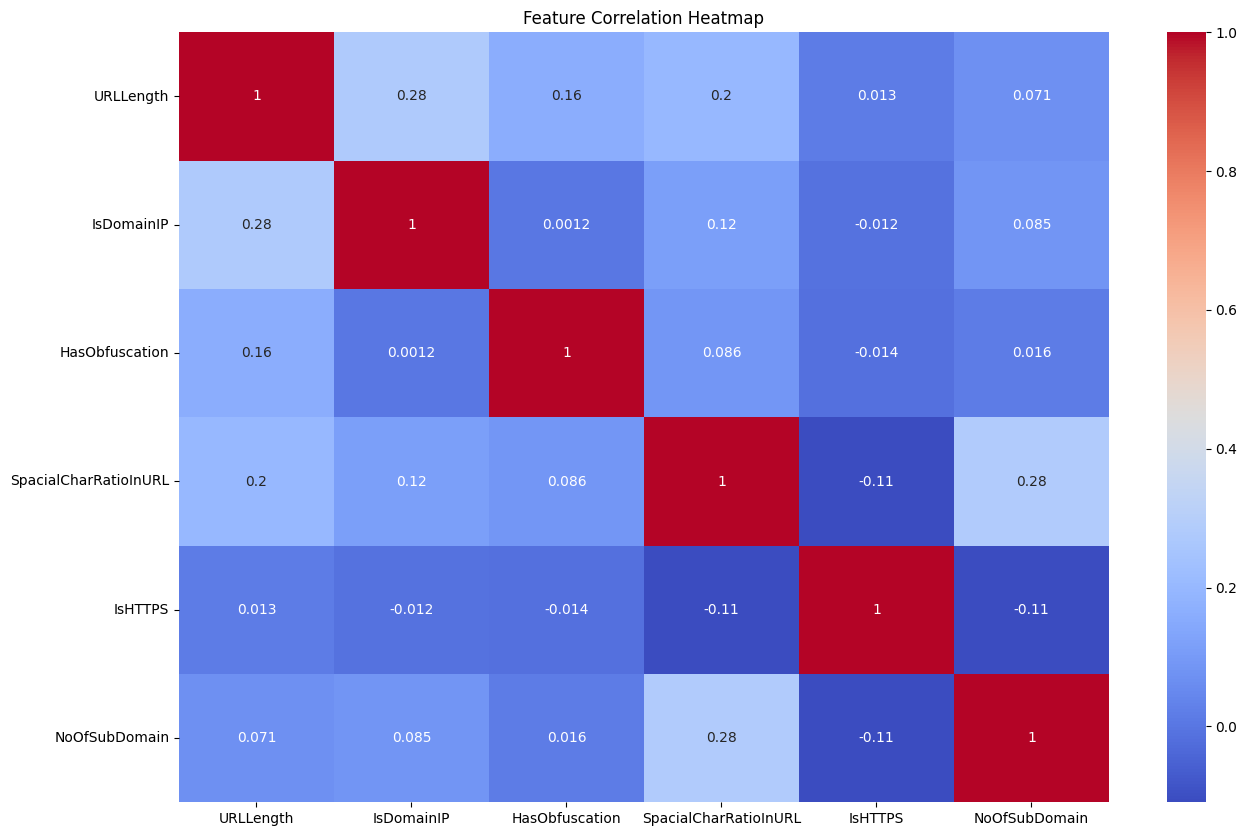

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

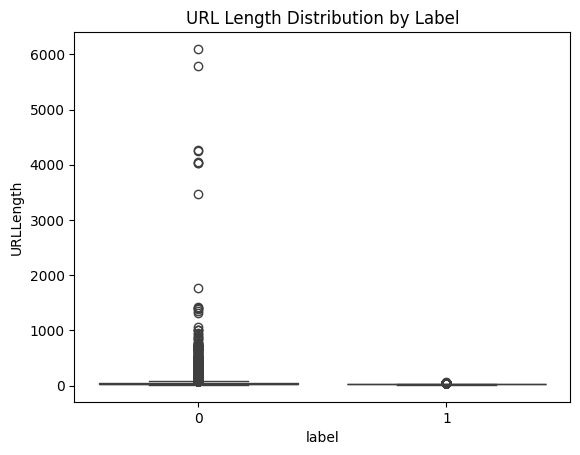

In [78]:
sns.boxplot(x='label', y='URLLength', data=df)
plt.title('URL Length Distribution by Label')
plt.show()

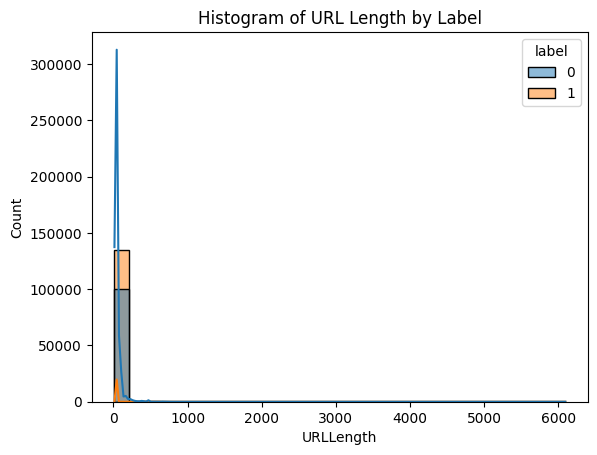

In [43]:
sns.histplot(data=df, x='URLLength', hue='label', kde=True, bins=30)
plt.title('Histogram of URL Length by Label')
plt.show()

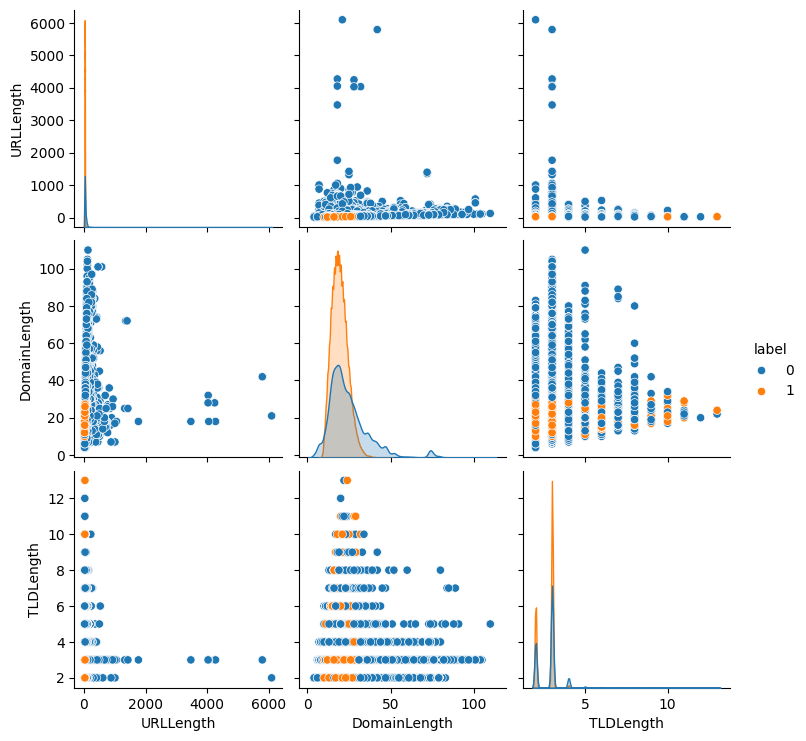

In [79]:
sns.pairplot(df[['URLLength', 'DomainLength', 'TLDLength', 'label']], hue='label')
plt.show()

In [80]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [81]:
# accuracy of the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98     20124
           1       0.98      0.99      0.98     27035

    accuracy                           0.98     47159
   macro avg       0.98      0.98      0.98     47159
weighted avg       0.98      0.98      0.98     47159



5- Save Model

In [82]:
# Save the model
import joblib
joblib.dump(model, '../models/URLSpoofing_model.pkl')



print("Model saved successfully!")

Model saved successfully!


6- Test Model

In [83]:
# Load the model
import pickle
with open("../models/URLSpoofing_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [84]:
import tldextract
import re
import pandas as pd
import numpy as np
from urllib.parse import urlparse

# دالة لاستخراج الخصائص من URL
def extract_features(url):
    features = {}

    # استخدام tldextract لتحليل الـ URL
    extracted = tldextract.extract(url)
    domain = extracted.domain
    subdomain = extracted.subdomain
    tld = extracted.suffix
    
     # إضافة الخصائص المطلوبة
    features['URLLength'] = len(url)
    features['IsDomainIP'] = 1 if re.match(r'^\d+\.\d+\.\d+\.\d+$', domain) else 0  # فحص إذا كان الـ domain هو IP
    features['HasObfuscation'] = 1 if '%' in url else 0  # فحص إذا كان هناك Obfuscation
    features['SpacialCharRatioInURL'] = sum([1 for c in url if not c.isalnum()]) / len(url)  # حساب نسبة الرموز الخاصة
    features['IsHTTPS'] = 1 if url.startswith("https://") else 0  # فحص إذا كان الرابط HTTPS
    features['NoOfSubDomain'] = subdomain.count(".") + 1 if subdomain else 0  # عدد الـ subdomains

    


    # تحويل الخصائص إلى DataFrame
    return pd.DataFrame([features])

# البيانات اللي هتختبر عليها
test_URL = [
    "www.example1.com",
    "www.phishing-example.com",
    "www.Go0gle.com",
    "www.facebook.com",
    "www.amazon.com",
    "www.microsoft.com"
]

# استخراج الخصائص من URLs
test_features = pd.concat([extract_features(url) for url in test_URL], ignore_index=True)

# عرض الخصائص المستخرجة
print(test_features)

# التنبؤ بالـ labels
predictions = model.predict(test_features)

# عرض كل موقع جنبه هل هو حقيقي أم مزيف
for url, pred in zip(test_URL, predictions):
    result = 'Legit' if pred == 0 else 'Spoofed'
    print(f"URL: {url} => {result}")


   URLLength  IsDomainIP  HasObfuscation  SpacialCharRatioInURL  IsHTTPS  \
0         16           0               0               0.125000        0   
1         24           0               0               0.125000        0   
2         14           0               0               0.142857        0   
3         16           0               0               0.125000        0   
4         14           0               0               0.142857        0   
5         17           0               0               0.117647        0   

   NoOfSubDomain  
0              1  
1              1  
2              1  
3              1  
4              1  
5              1  
URL: www.example1.com => Legit
URL: www.phishing-example.com => Legit
URL: www.Go0gle.com => Legit
URL: www.facebook.com => Legit
URL: www.amazon.com => Legit
URL: www.microsoft.com => Legit


---------------------------------------------------------------------------------------------------
as a machine learning not coming with true predection so we need to work with NLP